In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("housing.csv")

In [5]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
#we want to predict meadian housing value (our target variable)
#all the others are input features to predict median house value

#preprocessing and scaling

#check null value

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#total_bedroo has few entries missing around 200, so we will drop this

data.dropna()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
#deops null values, replaces the new dropped datat in data variable
data.dropna(inplace = True)

In [9]:
#check again
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
#split data into training and testing
#for splitting we need to load train_test_split from sklearn

#before doing train/test we need to define what x/y is
#like x train, x test, y train, y test
#x is actually the dataframe without the target variable

#axis = 1 as we are dropping 1 column

from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [11]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [12]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [13]:
#20% of testing 80% training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
train_data = x_train.join(y_train) #joining both x train and y train

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14715,-117.05,32.80,25.0,1905.0,250.0,865.0,253.0,6.4797,<1H OCEAN,249000.0
12708,-121.38,38.59,36.0,1239.0,237.0,764.0,222.0,3.0156,INLAND,103000.0
5824,-118.29,34.18,36.0,3120.0,620.0,1441.0,612.0,3.9041,<1H OCEAN,320400.0
13780,-117.05,34.01,27.0,5484.0,1205.0,2645.0,1131.0,2.1927,INLAND,116700.0
11138,-117.97,33.85,30.0,2513.0,476.0,1611.0,472.0,4.0061,<1H OCEAN,182900.0
...,...,...,...,...,...,...,...,...,...,...
598,-122.06,37.70,37.0,1893.0,310.0,821.0,315.0,4.6005,NEAR BAY,231600.0
11340,-117.93,33.75,24.0,1380.0,339.0,1472.0,304.0,4.2219,<1H OCEAN,162800.0
7810,-118.10,33.90,37.0,796.0,175.0,740.0,183.0,3.6000,<1H OCEAN,156400.0
12388,-116.44,33.77,18.0,4872.0,1110.0,955.0,656.0,2.2439,INLAND,97500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

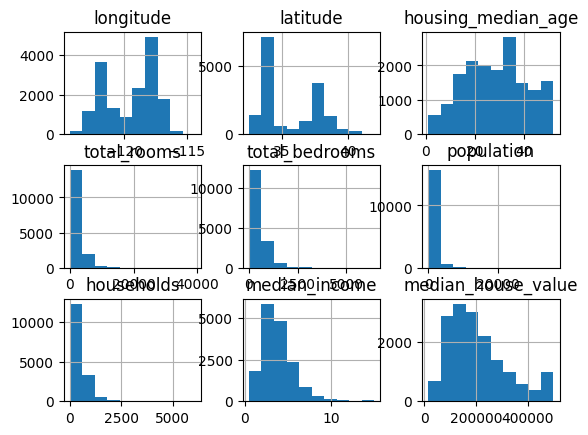

In [16]:
train_data.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

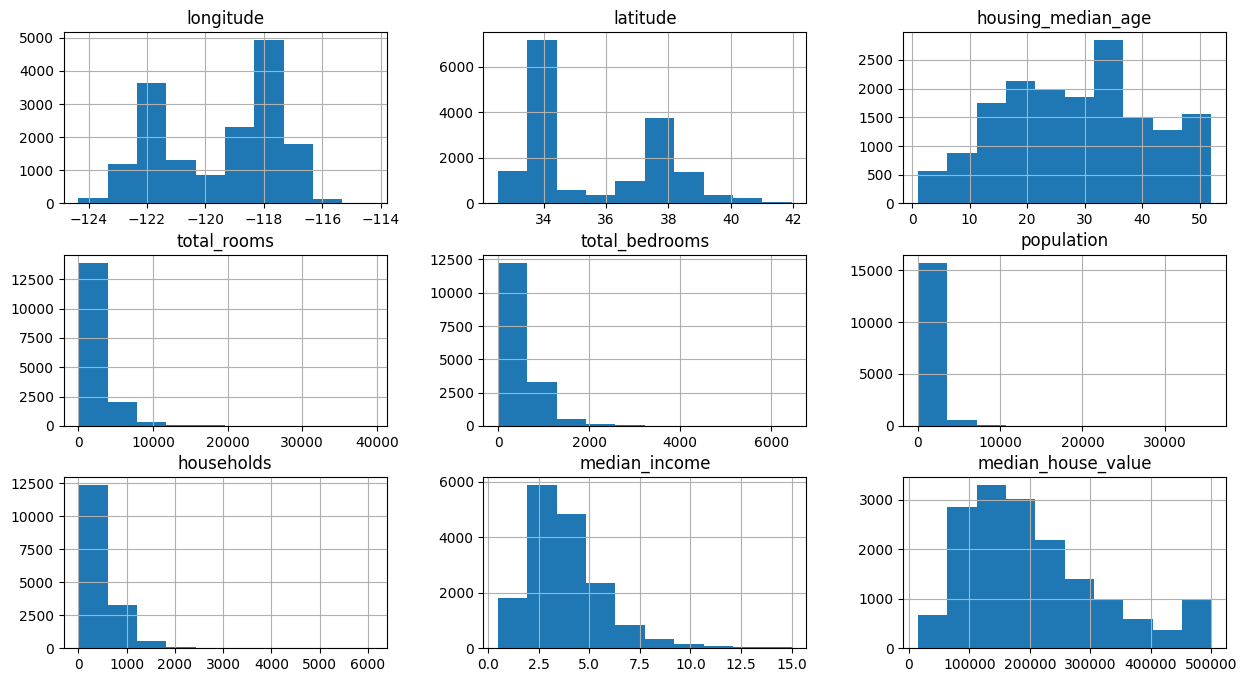

In [18]:
train_data.hist(figsize = (15, 8)) #changing figure size

In [20]:
#correlation matrix between variables

train_data.corr()

ValueError: could not convert string to float: '<1H OCEAN'

In [21]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

ValueError: could not convert string to float: '<1H OCEAN'

<Figure size 1500x800 with 0 Axes>

In [22]:
#to get a smooth graph log normal distribution
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'total_bedooms'}>, <Axes: >, <Axes: >]],
      dtype=object)

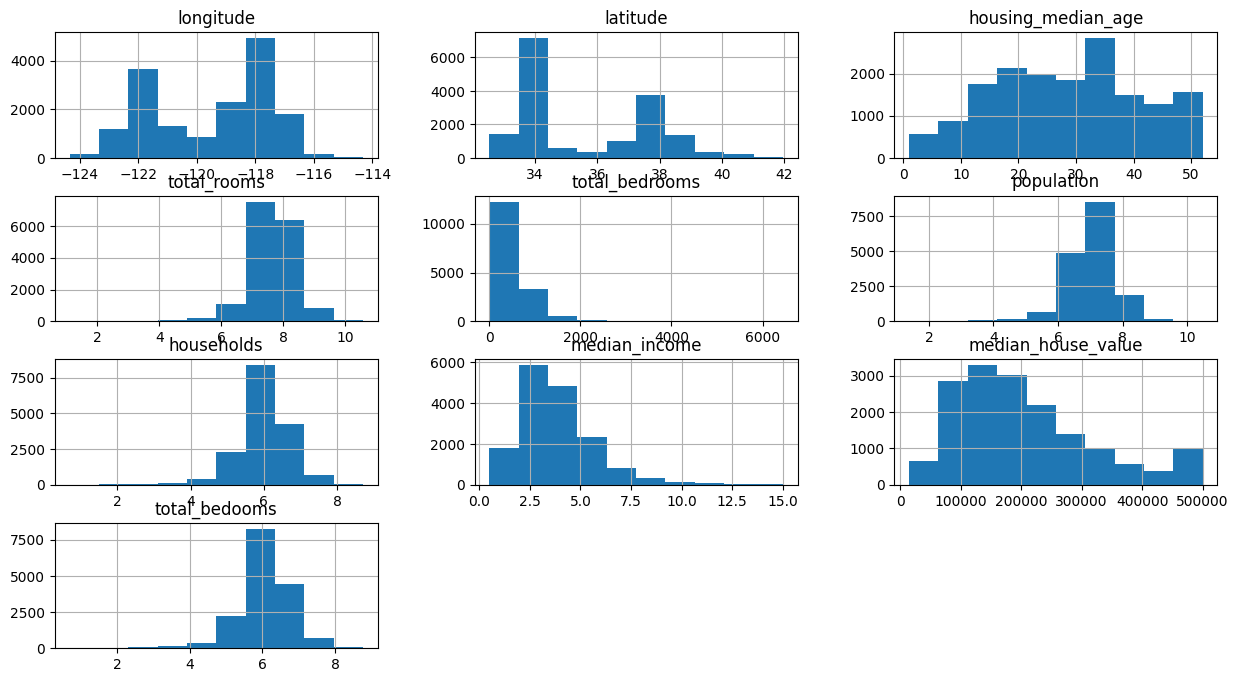

In [23]:
train_data.hist(figsize = (15, 8))

In [24]:
#we want to add ocean proximity features as well

#convert to numerical value

train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7244
INLAND        5156
NEAR OCEAN    2122
NEAR BAY      1820
ISLAND           4
Name: count, dtype: int64

In [25]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14715,True,False,False,False,False
12708,False,True,False,False,False
5824,True,False,False,False,False
13780,False,True,False,False,False
11138,True,False,False,False,False
...,...,...,...,...,...
598,False,False,False,True,False
11340,True,False,False,False,False
7810,True,False,False,False,False
12388,False,True,False,False,False


In [26]:
#join with train_data
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14715,-117.05,32.80,25.0,7.552762,250.0,6.763885,5.537334,6.4797,<1H OCEAN,249000.0,5.525453,True,False,False,False,False
12708,-121.38,38.59,36.0,7.122867,237.0,6.639876,5.407172,3.0156,INLAND,103000.0,5.472271,False,True,False,False,False
5824,-118.29,34.18,36.0,8.045909,620.0,7.273786,6.418365,3.9041,<1H OCEAN,320400.0,6.431331,True,False,False,False,False
13780,-117.05,34.01,27.0,8.609772,1205.0,7.880804,7.031741,2.1927,INLAND,116700.0,7.095064,False,True,False,False,False
11138,-117.97,33.85,30.0,7.829630,476.0,7.385231,6.159095,4.0061,<1H OCEAN,182900.0,6.167516,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-122.06,37.70,37.0,7.546446,310.0,6.711740,5.755742,4.6005,NEAR BAY,231600.0,5.739793,False,False,False,True,False
11340,-117.93,33.75,24.0,7.230563,339.0,7.295056,5.720312,4.2219,<1H OCEAN,162800.0,5.828946,True,False,False,False,False
7810,-118.10,33.90,37.0,6.680855,175.0,6.608001,5.214936,3.6000,<1H OCEAN,156400.0,5.170484,True,False,False,False,False
12388,-116.44,33.77,18.0,8.491465,1110.0,6.862758,6.487684,2.2439,INLAND,97500.0,7.013016,False,True,False,False,False


In [27]:
train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14715,-117.05,32.80,25.0,7.552762,250.0,6.763885,5.537334,6.4797,249000.0,5.525453,True,False,False,False,False
12708,-121.38,38.59,36.0,7.122867,237.0,6.639876,5.407172,3.0156,103000.0,5.472271,False,True,False,False,False
5824,-118.29,34.18,36.0,8.045909,620.0,7.273786,6.418365,3.9041,320400.0,6.431331,True,False,False,False,False
13780,-117.05,34.01,27.0,8.609772,1205.0,7.880804,7.031741,2.1927,116700.0,7.095064,False,True,False,False,False
11138,-117.97,33.85,30.0,7.829630,476.0,7.385231,6.159095,4.0061,182900.0,6.167516,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-122.06,37.70,37.0,7.546446,310.0,6.711740,5.755742,4.6005,231600.0,5.739793,False,False,False,True,False
11340,-117.93,33.75,24.0,7.230563,339.0,7.295056,5.720312,4.2219,162800.0,5.828946,True,False,False,False,False
7810,-118.10,33.90,37.0,6.680855,175.0,6.608001,5.214936,3.6000,156400.0,5.170484,True,False,False,False,False
12388,-116.44,33.77,18.0,8.491465,1110.0,6.862758,6.487684,2.2439,97500.0,7.013016,False,True,False,False,False


In [28]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [29]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14715,-117.05,32.80,25.0,7.552762,250.0,6.763885,5.537334,6.4797,249000.0,5.525453,True,False,False,False,False
12708,-121.38,38.59,36.0,7.122867,237.0,6.639876,5.407172,3.0156,103000.0,5.472271,False,True,False,False,False
5824,-118.29,34.18,36.0,8.045909,620.0,7.273786,6.418365,3.9041,320400.0,6.431331,True,False,False,False,False
13780,-117.05,34.01,27.0,8.609772,1205.0,7.880804,7.031741,2.1927,116700.0,7.095064,False,True,False,False,False
11138,-117.97,33.85,30.0,7.829630,476.0,7.385231,6.159095,4.0061,182900.0,6.167516,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-122.06,37.70,37.0,7.546446,310.0,6.711740,5.755742,4.6005,231600.0,5.739793,False,False,False,True,False
11340,-117.93,33.75,24.0,7.230563,339.0,7.295056,5.720312,4.2219,162800.0,5.828946,True,False,False,False,False
7810,-118.10,33.90,37.0,6.680855,175.0,6.608001,5.214936,3.6000,156400.0,5.170484,True,False,False,False,False
12388,-116.44,33.77,18.0,8.491465,1110.0,6.862758,6.487684,2.2439,97500.0,7.013016,False,True,False,False,False


In [30]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924930,-0.106897,0.025930,0.064840,0.104318,0.052830,-0.018445,-0.047208,0.057717,0.317225,-0.053008,0.009395,-0.476088,0.049558
latitude,-0.924930,1.000000,0.009883,-0.029576,-0.062033,-0.131168,-0.085099,-0.076340,-0.141659,-0.065761,-0.442124,0.347607,-0.016552,0.361819,-0.164986
housing_median_age,-0.106897,0.009883,1.000000,-0.310070,-0.318235,-0.239329,-0.239501,-0.116344,0.108537,-0.268706,0.044743,-0.235618,0.014101,0.250186,0.024826
total_rooms,0.025930,-0.029576,-0.310070,1.000000,0.756298,0.865498,0.933358,0.206328,0.155843,0.946085,0.023029,-0.016391,-0.010051,-0.010866,-0.000738
total_bedrooms,0.064840,-0.062033,-0.318235,0.756298,1.000000,0.720137,0.784093,-0.007473,0.046113,0.808770,0.019475,-0.007436,-0.005896,-0.016119,-0.003144
population,0.104318,-0.131168,-0.239329,0.865498,0.720137,1.000000,0.931125,-0.002553,-0.024551,0.898927,0.113957,-0.072014,-0.015889,-0.055407,-0.016271
households,0.052830,-0.085099,-0.239501,0.933358,0.784093,0.931125,1.000000,0.005677,0.069419,0.976136,0.073166,-0.088692,-0.011889,-0.002970,0.017818
median_income,-0.018445,-0.076340,-0.116344,0.206328,-0.007473,-0.002553,0.005677,1.000000,0.689835,-0.024864,0.171297,-0.237526,-0.009436,0.059295,0.020167
median_house_value,-0.047208,-0.141659,0.108537,0.155843,0.046113,-0.024551,0.069419,0.689835,1.000000,0.049177,0.262374,-0.484393,0.022480,0.157365,0.133596
total_bedooms,0.057717,-0.065761,-0.268706,0.946085,0.808770,0.898927,0.976136,-0.024864,0.049177,1.000000,0.043732,-0.047296,-0.004067,-0.013251,0.013346


<Axes: >

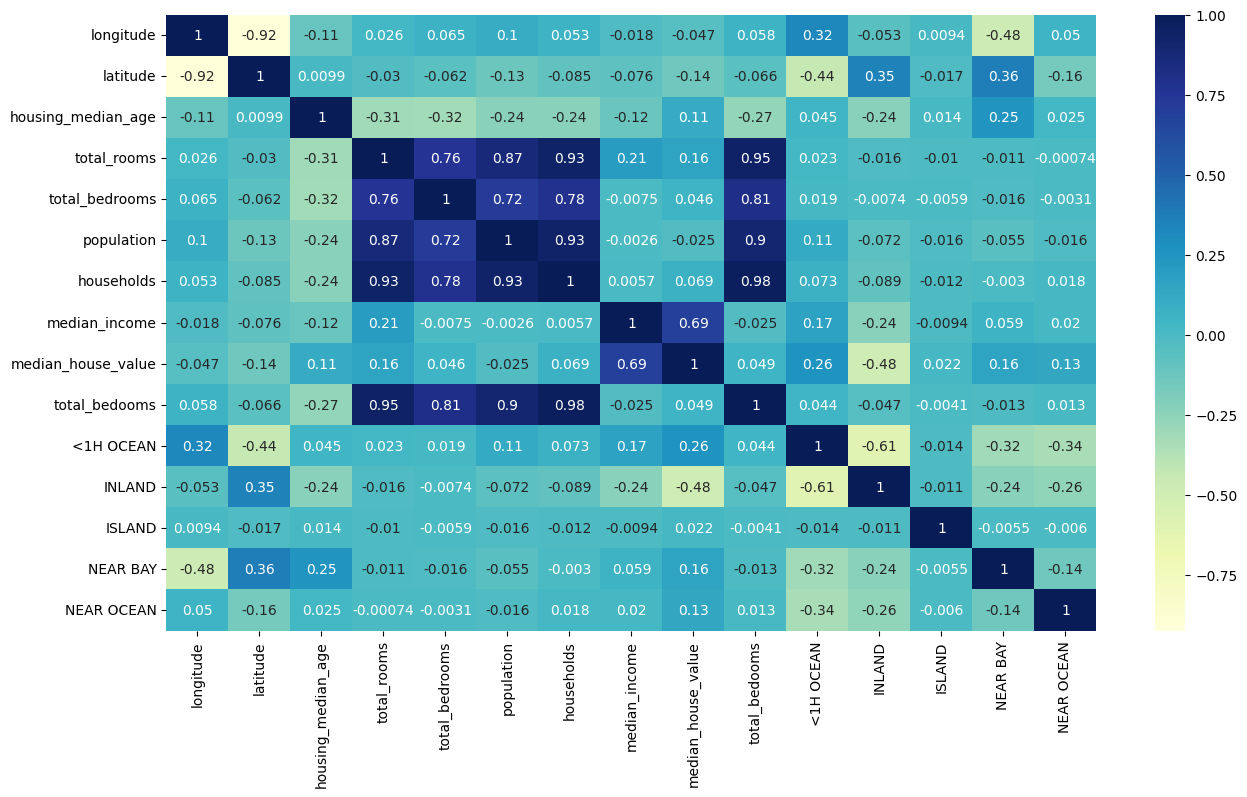

In [31]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

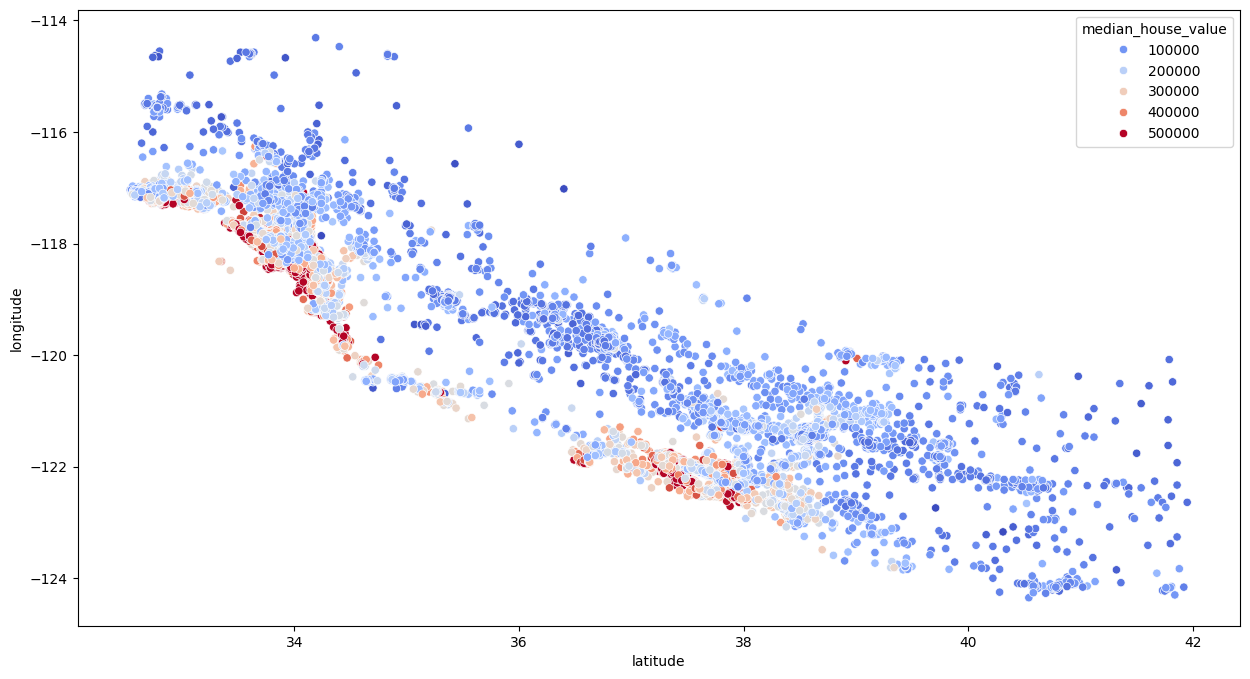

In [33]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x= "latitude", y = "longitude", data=train_data, hue="median_house_value", palette = "coolwarm")

In [34]:
#feature engineering
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

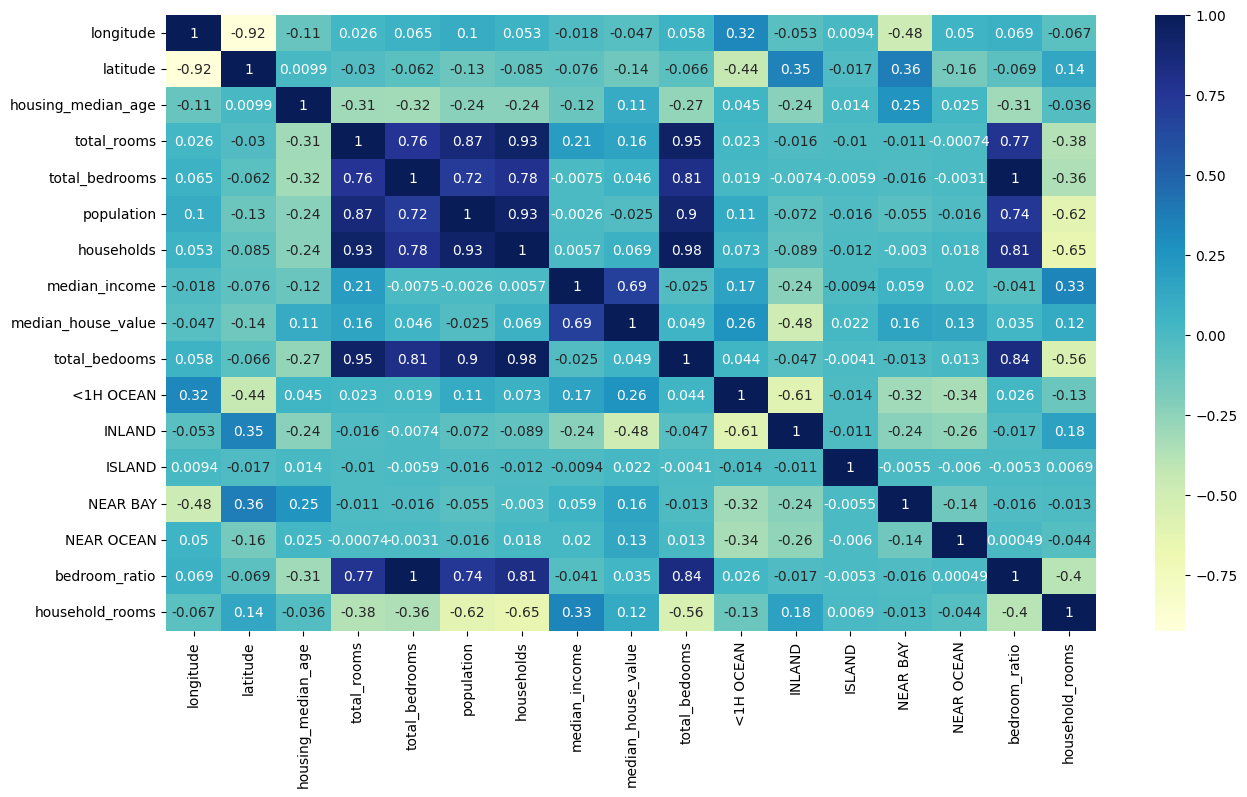

In [35]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [48]:
#simple linear regression model
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train,y_train)


LinearRegression()

In [37]:
#do the same thing to test data (shouldn't have split so early, repeat same process again)

test_data = x_test.join(y_test) #joining both x test and y test

#to get a smooth graph log normal distribution
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)


In [38]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [39]:
#feature engineering
test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [40]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9232,-120.09,37.00,11.0,8.232706,675.0,7.772753,6.513230,3.4598,74600.0,6.516193,False,True,False,False,False,81.990053,1.263997
16762,-122.49,37.68,35.0,7.785721,461.0,7.367709,6.156979,5.0659,238000.0,6.135565,False,False,False,False,True,59.210959,1.264536
13973,-116.82,34.24,11.0,8.665613,1527.0,6.570883,5.572154,2.5147,84700.0,7.331715,False,True,False,False,False,176.213727,1.555164
16098,-122.50,37.75,43.0,7.772332,481.0,7.129298,6.120297,4.0985,283200.0,6.177944,False,False,False,False,True,61.886191,1.269927
13960,-116.90,34.25,16.0,8.012681,523.0,6.322565,5.501258,3.5288,189700.0,6.261492,False,True,False,False,False,65.271537,1.456518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17537,-121.89,37.35,47.0,7.965546,631.0,7.709757,6.408529,3.2599,183100.0,6.448889,True,False,False,False,False,79.216168,1.242960
14135,-117.07,32.75,9.0,8.150468,749.0,7.431300,6.470800,3.3026,119100.0,6.620073,False,False,False,False,True,91.896564,1.259577
2929,-119.00,35.36,40.0,6.746412,227.0,6.639876,5.231109,0.9407,43600.0,5.429346,False,True,False,False,False,33.647515,1.289672
12592,-121.51,38.52,30.0,8.082402,588.0,7.063048,6.345636,4.0972,181400.0,6.378426,False,True,False,False,False,72.750648,1.273695


In [41]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14715,-117.05,32.80,25.0,7.552762,250.0,6.763885,5.537334,6.4797,249000.0,5.525453,True,False,False,False,False,33.100473,1.363971
12708,-121.38,38.59,36.0,7.122867,237.0,6.639876,5.407172,3.0156,103000.0,5.472271,False,True,False,False,False,33.273120,1.317300
5824,-118.29,34.18,36.0,8.045909,620.0,7.273786,6.418365,3.9041,320400.0,6.431331,True,False,False,False,False,77.057797,1.253576
13780,-117.05,34.01,27.0,8.609772,1205.0,7.880804,7.031741,2.1927,116700.0,7.095064,False,True,False,False,False,139.957243,1.224415
11138,-117.97,33.85,30.0,7.829630,476.0,7.385231,6.159095,4.0061,182900.0,6.167516,True,False,False,False,False,60.794696,1.271231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-122.06,37.70,37.0,7.546446,310.0,6.711740,5.755742,4.6005,231600.0,5.739793,False,False,False,True,False,41.078938,1.311116
11340,-117.93,33.75,24.0,7.230563,339.0,7.295056,5.720312,4.2219,162800.0,5.828946,True,False,False,False,False,46.884315,1.264016
7810,-118.10,33.90,37.0,6.680855,175.0,6.608001,5.214936,3.6000,156400.0,5.170484,True,False,False,False,False,26.194253,1.281100
12388,-116.44,33.77,18.0,8.491465,1110.0,6.862758,6.487684,2.2439,97500.0,7.013016,False,True,False,False,False,130.719492,1.308859


In [42]:
#simple linear regression model for TESTING
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [43]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9232,-120.09,37.00,11.0,8.232706,675.0,7.772753,6.513230,3.4598,6.516193,False,True,False,False,False,81.990053,1.263997
16762,-122.49,37.68,35.0,7.785721,461.0,7.367709,6.156979,5.0659,6.135565,False,False,False,False,True,59.210959,1.264536
13973,-116.82,34.24,11.0,8.665613,1527.0,6.570883,5.572154,2.5147,7.331715,False,True,False,False,False,176.213727,1.555164
16098,-122.50,37.75,43.0,7.772332,481.0,7.129298,6.120297,4.0985,6.177944,False,False,False,False,True,61.886191,1.269927
13960,-116.90,34.25,16.0,8.012681,523.0,6.322565,5.501258,3.5288,6.261492,False,True,False,False,False,65.271537,1.456518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17537,-121.89,37.35,47.0,7.965546,631.0,7.709757,6.408529,3.2599,6.448889,True,False,False,False,False,79.216168,1.242960
14135,-117.07,32.75,9.0,8.150468,749.0,7.431300,6.470800,3.3026,6.620073,False,False,False,False,True,91.896564,1.259577
2929,-119.00,35.36,40.0,6.746412,227.0,6.639876,5.231109,0.9407,5.429346,False,True,False,False,False,33.647515,1.289672
12592,-121.51,38.52,30.0,8.082402,588.0,7.063048,6.345636,4.0972,6.378426,False,True,False,False,False,72.750648,1.273695


In [44]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14715,-117.05,32.80,25.0,7.552762,250.0,6.763885,5.537334,6.4797,5.525453,True,False,False,False,False,33.100473,1.363971
12708,-121.38,38.59,36.0,7.122867,237.0,6.639876,5.407172,3.0156,5.472271,False,True,False,False,False,33.273120,1.317300
5824,-118.29,34.18,36.0,8.045909,620.0,7.273786,6.418365,3.9041,6.431331,True,False,False,False,False,77.057797,1.253576
13780,-117.05,34.01,27.0,8.609772,1205.0,7.880804,7.031741,2.1927,7.095064,False,True,False,False,False,139.957243,1.224415
11138,-117.97,33.85,30.0,7.829630,476.0,7.385231,6.159095,4.0061,6.167516,True,False,False,False,False,60.794696,1.271231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-122.06,37.70,37.0,7.546446,310.0,6.711740,5.755742,4.6005,5.739793,False,False,False,True,False,41.078938,1.311116
11340,-117.93,33.75,24.0,7.230563,339.0,7.295056,5.720312,4.2219,5.828946,True,False,False,False,False,46.884315,1.264016
7810,-118.10,33.90,37.0,6.680855,175.0,6.608001,5.214936,3.6000,5.170484,True,False,False,False,False,26.194253,1.281100
12388,-116.44,33.77,18.0,8.491465,1110.0,6.862758,6.487684,2.2439,7.013016,False,True,False,False,False,130.719492,1.308859


In [45]:
reg.score(x_test, y_test)

0.6716210994061184

In [49]:
#simple linear regression model and SCALING
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s,y_train)


LinearRegression()

In [51]:
#42 again
x_test_s = scaler.transform(x_test)

In [53]:
reg.score(x_test_s, y_test) #scaled value down

0.6716563747657966